In [12]:
import make_dataset as md
import manipulate_image as mi
import manipulate_dataset as mp
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import numpy as np

In [11]:
%matplotlib inline
date = '0509'

subs = [('01', 5400),
       ('02', 5000), ('03', 5100), ('04', 5100)]

configs = md.MyConfigsDM(img_size=(226, 128))
configs.tx_rate = 0x1c113
configs.ntx = 3

for (sub, length) in subs:

    path = {'bag': f"../sense/{date}/{sub}.bag",
            'lt': f"../sense/{date}/{sub}_timestamps.txt",
            'csi': f"../npsave/{date}/{date}A{sub}-csio.npy",
            'ct': f"../data/{date}/csi{date}A{sub}_time_mod.txt",
            'label': f"../sense/{date}/{sub}_labels.csv"
               }

    mkdata = md.MyDataMaker(configs=configs, paths=path, total_frames=length)
    mkdata.jupyter = True
    mkdata.csi_stream.extract_dynamic(mode='overall-divide', ref='tx', ref_antenna=1)
    mkdata.csi_stream.extract_dynamic(mode='highpass')
    mkdata.export_image(show_img=False)
    mkdata.depth_mask(0.7)
    mkdata.export_csi(dynamic_csi=False, pick_tx=0)
    #mkdata.lookup_image()
    mkdata.slice_by_label()

    #mkdata.playback_image()
    mkdata.save_dataset('../dataset/0509/make06', sub + '_rmk', 'csi', 'img')

Setting camera stream...Done
Setting CSI stream...
CSI npy load start... Thu Dec 28 00:50:35 2023
loaded
scaled
Removing sm...Done
CSI (186643, 30, 3, 3) load complete Thu Dec 28 00:51:30 2023
CSI apply dynamic component extraction: overall-divide versus tx1...Done
CSI apply dynamic component extraction: highpass versus rx0...Done
Starting exporting image...


  0%|          | 0/5400 [00:00<?, ?it/s]

Calibrating camera time against local time file...lag= -0.06508312516742283
Done
Masking...


  0%|          | 0/5400 [00:00<?, ?it/s]

Starting exporting CSI...


  0%|          | 0/5400 [00:00<?, ?it/s]

Slicing...Done
Saving...Done
Setting camera stream...Done
Setting CSI stream...
CSI npy load start... Thu Dec 28 01:27:48 2023
loaded
scaled
Removing sm...Done
CSI (178280, 30, 3, 3) load complete Thu Dec 28 01:28:41 2023
CSI apply dynamic component extraction: overall-divide versus tx1...Done
CSI apply dynamic component extraction: highpass versus rx0...Done
Starting exporting image...


  0%|          | 0/5000 [00:00<?, ?it/s]

Calibrating camera time against local time file...lag= -0.10003251504898071
Done
Masking...


  0%|          | 0/5000 [00:00<?, ?it/s]

Starting exporting CSI...


  0%|          | 0/5000 [00:00<?, ?it/s]

Slicing...Done
Saving...Done
Setting camera stream...Done
Setting CSI stream...
CSI npy load start... Thu Dec 28 02:02:20 2023
loaded
scaled
Removing sm...Done
CSI (173802, 30, 3, 3) load complete Thu Dec 28 02:03:11 2023
CSI apply dynamic component extraction: overall-divide versus tx1...Done
CSI apply dynamic component extraction: highpass versus rx0...Done
Starting exporting image...


  0%|          | 0/5100 [00:00<?, ?it/s]

Calibrating camera time against local time file...lag= -0.13225088638417862
Done
Masking...


  0%|          | 0/5100 [00:00<?, ?it/s]

Starting exporting CSI...


  0%|          | 0/5100 [00:00<?, ?it/s]

Slicing...Done
Saving...Done
Setting camera stream...Done
Setting CSI stream...
CSI npy load start... Thu Dec 28 02:37:05 2023
loaded
scaled
Removing sm...Done
CSI (211747, 30, 3, 3) load complete Thu Dec 28 02:38:07 2023
CSI apply dynamic component extraction: overall-divide versus tx1...Done
CSI apply dynamic component extraction: highpass versus rx0...Done
Starting exporting image...


  0%|          | 0/5100 [00:00<?, ?it/s]

Calibrating camera time against local time file...lag= -0.09882854569192026
Done
Masking...


  0%|          | 0/5100 [00:00<?, ?it/s]

Starting exporting CSI...


  0%|          | 0/5100 [00:00<?, ?it/s]

Slicing...Done
Saving...Done


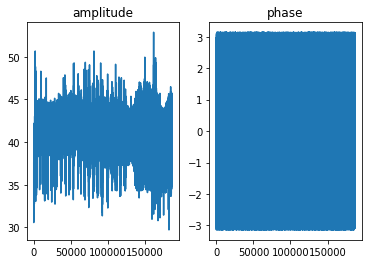

In [3]:
fig = plt.figure()
ax = fig.subplots(1, 2)
ax = ax.flatten()
ax[0].plot(np.abs(mkdata.csi_stream.csi[:, 0, 0, 0]))
ax[0].set_title('amplitude')
ax[1].plot(np.angle(mkdata.csi_stream.csi[:, 0, 0, 0]))
ax[1].set_title('phase')
plt.show()

In [5]:
mkdata.csi_stream.extract_dynamic(mode='overall-divide', ref='tx', ref_antenna=1)
mkdata.csi_stream.extract_dynamic(mode='highpass')
mkdata.export_csi(dynamic_csi=False, pick_tx=0)

CSI apply dynamic component extraction: overall-divide versus tx1...Done
CSI apply dynamic component extraction: highpass versus rx0...Done
Starting exporting CSI...


  0%|          | 0/5400 [00:00<?, ?it/s]

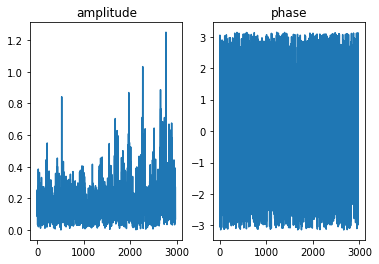

In [12]:
fig = plt.figure()
ax = fig.subplots(1, 2)
ax = ax.flatten()
ax[0].plot(mkdata.result['csi'][:, 0, 0, 0])
ax[0].set_title('amplitude')
ax[1].plot(mkdata.result['csi'][:, 1, 0, 0])
ax[1].set_title('phase')
plt.show()

In [7]:
csi = mkdata.__setup_csi_stream__()

Setting CSI stream...
CSI npy load start... Thu Dec 28 00:28:49 2023
loaded
scaled
Removing sm...Done
CSI (186643, 30, 3, 3) load complete Thu Dec 28 00:29:43 2023


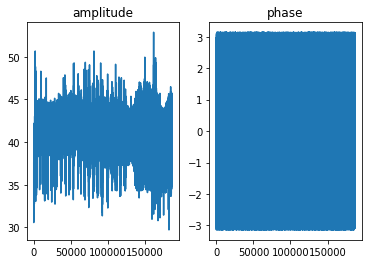

In [8]:
fig = plt.figure()
ax = fig.subplots(1, 2)
ax = ax.flatten()
ax[0].plot(np.abs(csi.csi[:, 0, 0, 0]))
ax[0].set_title('amplitude')
ax[1].plot(np.angle(csi.csi[:, 0, 0, 0]))
ax[1].set_title('phase')
plt.show()

In [9]:
csi.extract_dynamic(mode='overall-divide', ref='tx', ref_antenna=1)
csi.extract_dynamic(mode='highpass')

CSI apply dynamic component extraction: overall-divide versus tx1...Done
CSI apply dynamic component extraction: highpass versus rx0...Done


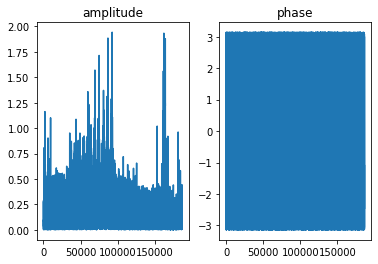

In [10]:
fig = plt.figure()
ax = fig.subplots(1, 2)
ax = ax.flatten()
ax[0].plot(np.abs(csi.csi[:, 0, 0, 0]))
ax[0].set_title('amplitude')
ax[1].plot(np.angle(csi.csi[:, 0, 0, 0]))
ax[1].set_title('phase')
plt.show()

In [14]:
names = ('01', '02', '03', '04')
for name in names:
    print(name)
    gen = mi.ImageGen(name)
    gen.load_images(f"../dataset/0509/make06/{name}_rmk_img.npy")
    gen.bounding_box(min_area=0, show=False)
    gen.align_to_center(unified_size=True)
    #gen.print_len()
    gen.save('../dataset/0509/make06-resize/', save_terms=('raw_bbx', 'gen_img'))
    #gen.view_generation()

01
Loading images...Complete!
Labeling bounding boxes...Complete!
Starting exporting image...


100% 2479/2479 [02:19<00:00, 17.71it/s]


Generation complete!
Saved raw_bbx
Saved gen_img
02
Loading images...Complete!
Labeling bounding boxes...Complete!
Starting exporting image...


100% 3083/3083 [03:34<00:00, 14.35it/s]


Generation complete!
Saved raw_bbx
Saved gen_img
03
Loading images...Complete!
Labeling bounding boxes...Complete!
Starting exporting image...


100% 2456/2456 [02:16<00:00, 18.01it/s]


Generation complete!
Saved raw_bbx
Saved gen_img
04
Loading images...Complete!
Labeling bounding boxes...Complete!
Starting exporting image...


100% 2972/2972 [03:20<00:00, 14.85it/s]


Generation complete!
Saved raw_bbx
Saved gen_img


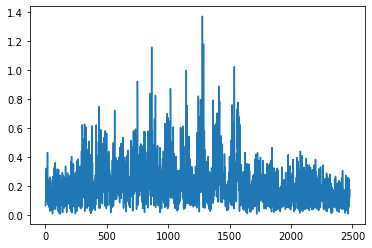

(2479, 2, 90, 100)
float64


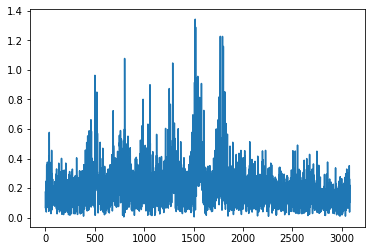

(3083, 2, 90, 100)
float64


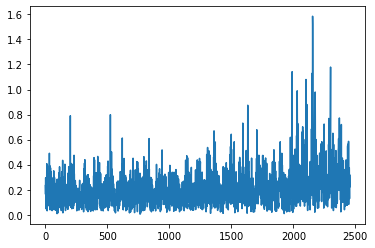

(2456, 2, 90, 100)
float64


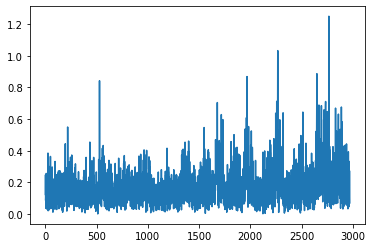

(2972, 2, 90, 100)
float64


In [17]:
names = ('01', '02', '03', '04')
for name in names:
    md.asx(f"../dataset/0509/make06/{name}_rmk_csi.npy")

In [18]:
md.regroup('../dataset/0509/make06/', '../dataset/0509/make06-finished/', ('01', '02', '03', '04'))

01_rmk_csi.npy (2479, 2, 90, 100)
01_rmk_img.npy (2479, 128, 226)
02_rmk_csi.npy (3083, 2, 90, 100)
02_rmk_img.npy (3083, 128, 226)
03_rmk_csi.npy (2456, 2, 90, 100)
03_rmk_img.npy (2456, 128, 226)
04_rmk_csi.npy (2972, 2, 90, 100)
04_rmk_img.npy (2972, 128, 226)
csi 10990
img 10990
All saved!


In [13]:
results = {'img': (1, 1, 128, 128),
           'bbx': (1, 4)}

In [15]:
rg = mp.Regrouper('../dataset/0509/make06-resize/', '../dataset/0509/make06-finished/', ('01', '02', '03', '04'), results)
rg.load()
rg.regroup()

Loaded 01_raw_bbx.npy of (2479, 4)
Loaded 01_gen_img.npy of (2479, 128, 128)
Loaded 02_raw_bbx.npy of (3083, 4)
Loaded 02_gen_img.npy of (3083, 128, 128)
Loaded 03_raw_bbx.npy of (2456, 4)
Loaded 03_gen_img.npy of (2456, 128, 128)
Loaded 04_raw_bbx.npy of (2972, 4)
Loaded 04_gen_img.npy of (2972, 128, 128)
All loaded!
Saved img of len 10990
All saved!
Saved bbx of len 10990
All saved!


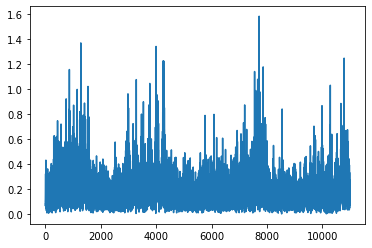

(10990, 2, 90, 100)
float64


In [16]:
mp.asx(f"../dataset/0509/make06-finished/csi.npy")